In [1]:
import torch
import pandas as pd
from tqdm.notebook import tqdm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df = pd.read_csv("sexist_data.csv")
df.shape

(6748, 5)

In [3]:
df['text'] = df['text'].str.replace('[(#@&!?)]','')

<ipython-input-3-5ae938c3be89>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[(#@&!?)]','')


In [7]:
import contractions

for index, row in df.iterrows():
  row['text'] = contractions.fix(row['text'])
  row['text'] = " ".join(row['text'].split())

In [8]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')

df.head(5)

<ipython-input-8-b97639880cca>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]+', '')


,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
1,sexism2022_english-760,They get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-1108,ugly chicks A pussy is a pussy,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
4,sexism2022_english-10014,How about I talk shit to an idiot like you Are...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."


In [9]:
df["text"] = df["text"].str.replace("URL","")
df["text"] = df["text"].str.replace("USER","")
df["text"] = df["text"].str.lower()
df.head(5)

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
1,sexism2022_english-760,they get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-1108,ugly chicks a pussy is a pussy,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
4,sexism2022_english-10014,how about i talk shit to an idiot like you are...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."


In [10]:
df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
1,sexism2022_english-760,they get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-1108,ugly chicks a pussy is a pussy,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
4,sexism2022_english-10014,how about i talk shit to an idiot like you are...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."
...,...,...,...,...,...
6743,sexism2022_english-19317,another democrat with signal glassesthere is n...,sexist,2. derogation,2.1 descriptive attacks
6744,sexism2022_english-15667,that is what we do,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."
6745,sexism2022_english-1400,never forget it is always the mans fault never...,sexist,4. prejudiced discussions,4.2 supporting systemic discrimination against...
6746,sexism2022_english-4515,it is the guys who love these instagram sluts ...,sexist,2. derogation,2.2 aggressive and emotive attacks


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Encoding categorical data to integer labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_vector'] = le.fit_transform(df['label_vector'])
print(df['label_vector'])

0        4
1        2
2        4
3        1
4        5
        ..
6743     2
6744     5
6745    10
6746     3
6747     2
Name: label_vector, Length: 6748, dtype: int64


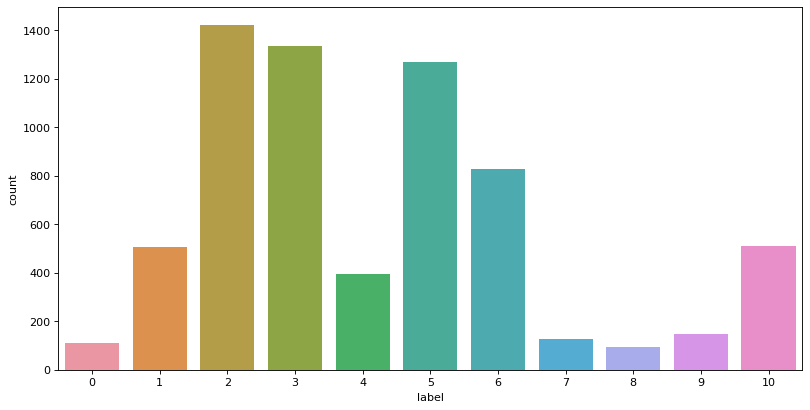

In [13]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
sns.countplot(x = df.label_vector)
plt.xlabel('label');


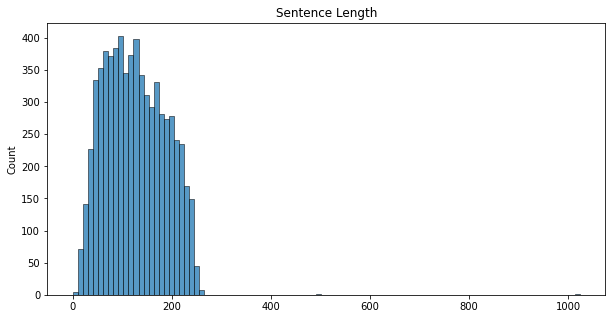

In [14]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.text], bins=100)
plt.title('Sentence Length')
plt.show()


In [15]:
#find the maximum length
max_len = max([len(sent) for sent in df.text])
print('Max length: ', max_len)


Max length:  1024


In [16]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                   df.label_vector.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.label_vector.values)


In [17]:
#create new column
df['data_type'] = ['not_set'] * df.shape[0]
df.head()


,rewire_id,text,label_sexist,label_category,label_vector,data_type
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,4,not_set
1,sexism2022_english-760,they get the initial chance because they are a...,sexist,2. derogation,2,not_set
2,sexism2022_english-1108,ugly chicks a pussy is a pussy,sexist,2. derogation,4,not_set
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1,not_set
4,sexism2022_english-10014,how about i talk shit to an idiot like you are...,sexist,3. animosity,5,not_set


In [18]:
#fill in data type
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'


In [19]:
df.head()

,rewire_id,text,label_sexist,label_category,label_vector,data_type
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,4,val
1,sexism2022_english-760,they get the initial chance because they are a...,sexist,2. derogation,2,train
2,sexism2022_english-1108,ugly chicks a pussy is a pussy,sexist,2. derogation,4,train
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1,train
4,sexism2022_english-10014,how about i talk shit to an idiot like you are...,sexist,3. animosity,5,train


In [20]:
df.groupby(['label_vector', 'data_type']).count()


rewire_id  text  label_sexist  label_category
label_vector data_type                                               
0            train             95    95            95              95
             val               17    17            17              17
1            train            430   430           430             430
             val               76    76            76              76
2            train           1209  1209          1209            1209
             val              214   214           214             214
3            train           1135  1135          1135            1135
             val              201   201           201             201
4            train            336   336           336             336
             val               59    59            59              59
5            train           1078  1078          1078            1078
             val              190   190           190             190
6            train            705   705           705             705
             val              124   124           124             124
7            train            108   108           108             108
             val               19    19            19              19
8            train             79    79            79              79
             val               14    14            14              14
9            train            127   127           127             127
             val               22    22            22              22
10           train            433   433           433             433
             val               77    77            77              77

TOKENIZATION

In [21]:
from transformers import RobertaTokenizer, RobertaModel
from torch.utils.data import TensorDataset


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 30.5 MB/s 
     |████████████████████████████████| 182 kB 71.3 MB/s 
     |████████████████████████████████| 7.6 MB 69.8 MB/s 


In [22]:
#load tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
#                                          do_lower_case = True)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [23]:
#tokenize train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [24]:
#tokenizer val set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].text.values,
                                                #add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


In [25]:
encoded_data_train


{'input_ids': tensor([[    0, 10010,   120,  ...,     1,     1,     1],
        [    0,  3252,   352,  ...,     1,     1,     1],
        [    0, 44412,    69,  ...,     1,     1,     1],
        ...,
        [    0, 20042,  4309,  ...,     1,     1,     1],
        [    0,   405,    16,  ...,     1,     1,     1],
        [    0, 42290,   293,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [26]:
# le.get_params()
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'1.1 threats of harm': 0, '1.2 incitement and encouragement of harm': 1, '2.1 descriptive attacks': 2, '2.2 aggressive and emotive attacks': 3, '2.3 dehumanising attacks & overt sexual objectification': 4, '3.1 casual use of gendered slurs, profanities, and insults': 5, '3.2 immutable gender differences and gender stereotypes': 6, '3.3 backhanded gendered compliments': 7, '3.4 condescending explanations or unwelcome advice': 8, '4.1 supporting mistreatment of individual women': 9, '4.2 supporting systemic discrimination against women as a group': 10}


ENCODING

In [27]:
#encode train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].label_vector.values)


In [28]:
#encode val set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

#convert data type to torch.tensor
labels_val = torch.tensor(df[df.data_type == 'val'].label_vector.values)


In [29]:
input_ids_train


tensor([[    0, 10010,   120,  ...,     1,     1,     1],
        [    0,  3252,   352,  ...,     1,     1,     1],
        [    0, 44412,    69,  ...,     1,     1,     1],
        ...,
        [    0, 20042,  4309,  ...,     1,     1,     1],
        [    0,   405,    16,  ...,     1,     1,     1],
        [    0, 42290,   293,  ...,     1,     1,     1]])

In [30]:
attention_masks_train


tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [31]:
labels_train


tensor([ 2,  4,  1,  ..., 10,  3,  2])

In [32]:
#create dataloader
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [33]:
print(len(dataset_train))
print(len(dataset_val))


5735
1013


In [34]:
dataset_train


In [35]:
dataset_train.tensors


(tensor([[    0, 10010,   120,  ...,     1,     1,     1],
         [    0,  3252,   352,  ...,     1,     1,     1],
         [    0, 44412,    69,  ...,     1,     1,     1],
         ...,
         [    0, 20042,  4309,  ...,     1,     1,     1],
         [    0,   405,    16,  ...,     1,     1,     1],
         [    0, 42290,   293,  ...,     1,     1,     1]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([ 2,  4,  1,  ..., 10,  3,  2]))


SET UP BERT PRETRAINED MODEL
```
# This is formatted as code
```



In [36]:
label_dict = {'1.1 threats of harm': 0, '1.2 incitement and encouragement of harm': 1, '2.1 descriptive attacks': 2, '2.2 aggressive and emotive attacks': 3,
              '2.3 dehumanising attacks & overt sexual objectification': 4, '3.1 casual use of gendered slurs, profanities, and insults': 5,
              '3.2 immutable gender differences and gender stereotypes': 6, '3.3 backhanded gendered compliments': 7, 
              '3.4 condescending explanations or unwelcome advice': 8, '4.1 supporting mistreatment of individual women': 9, 
              '4.2 supporting systemic discrimination against women as a group': 10}

In [37]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('roberta-base',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)


You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing BertForSequenceClassification: ['roberta.encoder.layer.6.attention.output.dense.bias', 'roberta.encoder.layer.0.output.LayerNorm.bias', 'roberta.encoder.layer.8.attention.self.key.weight', 'roberta.encoder.layer.3.intermediate.dense.weight', 'roberta.encoder.layer.3.attention.output.LayerNorm.weight', 'roberta.encoder.layer.8.intermediate.dense.weight', 'roberta.encoder.layer.9.output.LayerNorm.weight', 'roberta.encoder.layer.10.attention.self.value.bias', 'roberta.encoder.layer.4.output.LayerNorm.bias', 'roberta.encoder.layer.11.attention.self.query.bias', 'roberta.encoder.layer.1.attention.self.value.bias', 'roberta.encoder.layer.5.attention.self.key.weight', 'roberta.encoder.layer.9.output.dense.bias', 'roberta.encoder.layer.9.attention.output.dense.weight', 'roberta.encoder.layer.10.output.LayerNorm.weight', 'roberta.encoder.layer.10.intermediate.dense.weight', 'roberta.encoder.layer.5.intermediate

In [38]:
#model summary
model.config


BertConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "ab

Create Data Loaders

In [39]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4 #since we have limited resource

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) #since we don't have to do backpropagation for this step

Set Up Optimizer and Scheduler


In [40]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 10

#load optimizer
optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5



/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [41]:
#load scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

Define Performance Metrics


In [42]:
import numpy as np
from sklearn.metrics import f1_score

#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')


In [43]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')


In [44]:
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2].type(torch.LongTensor).to(device)}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

TRAIN MODEL

In [45]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)



In [46]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [47]:
for epoch in tqdm(range(1, epochs+1)):

    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0
    
    #set up progress bar
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    
    for batch in progress_bar:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2].type(torch.LongTensor).to(device)}
        
        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()
        
        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    tqdm.write('\nEpoch {epoch}')
    
    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 2.064414071280255


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.9420320466160774
F1 Score (weighted): 0.20145504871152067


Epoch 2:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.8610432405684616


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.8316355533897877
F1 Score (weighted): 0.26799181001888767


Epoch 3:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.7019452611439065


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.937059909105301
F1 Score (weighted): 0.2533656493278433


Epoch 4:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.5658592786250254


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.7019386477768421
F1 Score (weighted): 0.32103237823490005


Epoch 5:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.3820606729475524


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.6602205485105515
F1 Score (weighted): 0.38086066263683394


Epoch 6:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.2142894265022404


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.6796549372375011
F1 Score (weighted): 0.4334492964377555


Epoch 7:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.0639444477336593


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.6682586669921875
F1 Score (weighted): 0.456280706560603


Epoch 8:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.9209115086811772


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.7369661554694176
F1 Score (weighted): 0.4719566978291293


Epoch 9:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.8181145250137423


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.7228783685714006
F1 Score (weighted): 0.4789328373784828


Epoch 10:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.7180446266785077


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.751970075070858
F1 Score (weighted): 0.4905340505433679


Model Evaluation


In [48]:
outputs.loss


tensor(0.2582, device='cuda:0', grad_fn=<NllLossBackward0>)

In [49]:
outputs.logits


tensor([[-2.0646, -0.8710,  3.7835, -2.5021, -1.2717, -2.7937,  2.0000, -0.0640,
          1.3047, -1.2504,  2.4961],
        [-0.6384, -0.4315, -0.8511,  0.1904,  1.2121,  6.0057, -1.3033, -0.6366,
         -0.0932, -0.7438, -1.6760],
        [-1.6138, -0.9175,  0.2354,  5.3232,  0.3520,  4.1944, -2.1445, -0.7647,
         -1.6758, -0.5061, -2.0354]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [50]:
#save model
model.to(device)
pass


In [51]:
#evaluate
_, predictions, true_vals = evaluate(dataloader_val)

  0%|          | 0/32 [00:00<?, ?it/s]

In [52]:
#get accuracy score
accuracy_per_class(predictions, true_vals)

Class: 1.1 threats of harm
Accuracy:2/17

Class: 1.2 incitement and encouragement of harm
Accuracy:35/76

Class: 2.1 descriptive attacks
Accuracy:122/214

Class: 2.2 aggressive and emotive attacks
Accuracy:124/201

Class: 2.3 dehumanising attacks & overt sexual objectification
Accuracy:14/59

Class: 3.1 casual use of gendered slurs, profanities, and insults
Accuracy:118/190

Class: 3.2 immutable gender differences and gender stereotypes
Accuracy:58/124

Class: 3.3 backhanded gendered compliments
Accuracy:0/19

Class: 3.4 condescending explanations or unwelcome advice
Accuracy:0/14

Class: 4.1 supporting mistreatment of individual women
Accuracy:10/22

Class: 4.2 supporting systemic discrimination against women as a group
Accuracy:26/77



In [53]:
predictions

array([[-1.3691776 , -2.9515936 ,  3.1657307 , ..., -0.729788  ,
         0.31629905,  1.5149858 ],
       [-1.8215047 , -0.46382117, -0.41909984, ...,  0.38888228,
        -0.53507876,  0.3164661 ],
       [-0.4069501 , -0.42212063,  1.2039138 , ..., -1.1404698 ,
        -1.1002096 , -3.40841   ],
       ...,
       [-2.1672554 , -0.583248  ,  0.92813414, ..., -1.7823824 ,
        -1.1091361 , -1.694074  ],
       [-2.5195565 , -0.6835203 ,  3.6549897 , ..., -1.1901637 ,
        -0.16777653,  1.1896245 ],
       [-0.6727777 , -0.8780254 ,  1.0266371 , ...,  2.1450567 ,
        -1.9381071 ,  2.6288145 ]], dtype=float32)

In [54]:
true_vals

array([4, 2, 3, ..., 3, 4, 6])

In [55]:
preds_flat = np.argmax(predictions, axis=1).flatten()
labels_flat = true_vals.flatten()

print(preds_flat)
print(labels_flat)

[2 6 4 ... 3 2 6]
[4 2 3 ... 3 4 6]


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [57]:
accuracy = accuracy_score(y_true = labels_flat, y_pred = preds_flat )
f1 = f1_score(y_true = labels_flat, y_pred = preds_flat, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = labels_flat, y_pred = preds_flat ))

The accuracy from sentiment classification: 0.5024679170779862
with f1 score: 0.4905340505433679
              precision    recall  f1-score   support

           0       0.22      0.12      0.15        17
           1       0.69      0.46      0.55        76
           2       0.50      0.57      0.53       214
           3       0.49      0.62      0.54       201
           4       0.24      0.24      0.24        59
           5       0.58      0.62      0.60       190
           6       0.50      0.47      0.48       124
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00        14
           9       0.40      0.45      0.43        22
          10       0.52      0.34      0.41        77

    accuracy                           0.50      1013
   macro avg       0.38      0.35      0.36      1013
weighted avg       0.49      0.50      0.49      1013



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Sentiment classification')

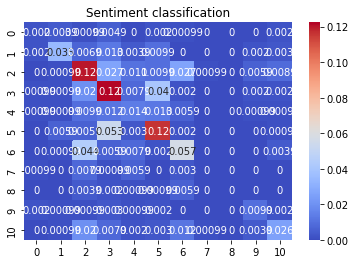

In [58]:
sns.heatmap(confusion_matrix(y_true= labels_flat, y_pred = preds_flat) / len(preds_flat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

In [59]:
torch.save(model, "model_C")

In [60]:
# load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)